# Classification Project Using KNN Algorthim
## advertising Dataset

### Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect Data

In [18]:
df = pd.read_csv('advertisment.csv')

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [22]:
df.drop({'Ad Topic Line','City','Country','Timestamp','Male'},axis=1,inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [69]:
df.drop('Clicked on Ad',axis=1).describe().round(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.0,1000.0,1000.0,1000.0
mean,65.0,36.0,55000.0,180.0
std,15.9,8.8,13414.6,43.9
min,32.6,19.0,13996.5,104.8
25%,51.4,29.0,47031.8,138.8
50%,68.2,35.0,57012.3,183.1
75%,78.5,42.0,65470.6,218.8
max,91.4,61.0,79484.8,270.0


## Data Preprocessing

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(df.drop('Clicked on Ad',axis=1))

StandardScaler()

In [27]:
scaled_features = scaler.transform(df.drop('Clicked on Ad',axis=1))

In [28]:
scaled_features

array([[ 0.24926659, -0.11490498,  0.50969109,  1.73403   ],
       [ 0.96113227, -0.57042523,  1.00253021,  0.31380538],
       [ 0.28208309, -1.13982553,  0.35694859,  1.28758905],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, -1.35892388],
       [-0.59638946, -1.93698596, -0.97548353,  0.18117208],
       [-1.26155474, -1.13982553, -1.87383208, -0.0376045 ]])

In [29]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [31]:
df_feat.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,0.249267,-0.114905,0.509691,1.734030
1,0.961132,-0.570425,1.002530,0.313805
2,0.282083,-1.139826,0.356949,1.287589
3,0.577432,-0.798185,-0.014456,1.501580
4,0.212664,-0.114905,1.408868,1.038731


## Build The Model 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df_feat
y = df['Clicked on Ad']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
pred = knn.predict(X_test)

In [43]:
pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       157
           1       0.94      0.94      0.94       143

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [46]:
print(confusion_matrix(pred, y_test))

[[149   9]
 [  8 134]]


## Evaluate The Model 

In [49]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

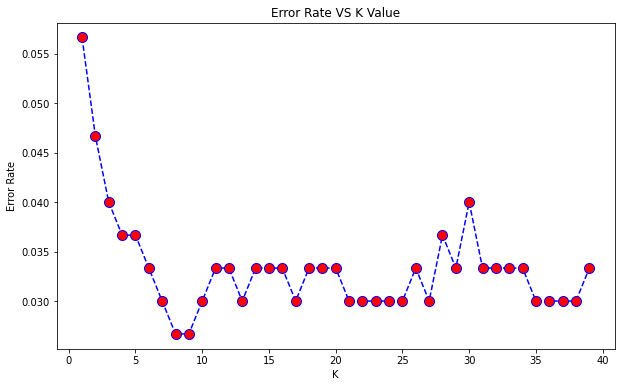

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [62]:
knn = KNeighborsClassifier(n_neighbors=17)

In [63]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [64]:
pred = knn.predict(X_test)

In [65]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       157
           1       0.99      0.94      0.97       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [66]:
print(confusion_matrix(y_test, pred))

[[156   1]
 [  8 135]]


# 